In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#To see all the dataset available in seaborn
sns.get_dataset_names()
#To extract the data we use  = smp.load_dataset("

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
Tip=sns.load_dataset("tips")

In [4]:
Tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: ylabel='total_bill'>

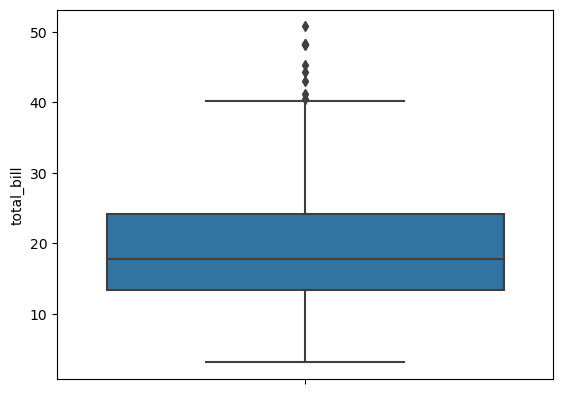

In [5]:
sns.boxplot(y='total_bill', data=Tip)

In [6]:
#Check for null values
null_values = Tip.isnull().sum()

In [7]:
null_values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
from scipy.stats import zscore
Zscores = zscore(Tip['total_bill'].values)
Zscores

array([-3.14711305e-01, -1.06323531e+00,  1.37779900e-01,  4.38315103e-01,
        5.40744704e-01,  6.19536705e-01, -1.23995452e+00,  7.98507107e-01,
       -5.34203307e-01, -5.63468908e-01, -1.07111451e+00,  1.74175992e+00,
       -4.91430507e-01, -1.52624903e-01, -5.57840908e-01,  2.01939101e-01,
       -1.06436091e+00, -3.93503306e-01, -3.16962505e-01,  9.72582994e-02,
       -2.10030504e-01,  5.67366990e-02, -4.52034507e-01,  2.21000952e+00,
        3.83349840e-03, -2.22412104e-01, -7.22178510e-01, -7.98719310e-01,
        2.15446301e-01, -1.53017018e-02, -1.15215771e+00, -1.61629703e-01,
       -5.31952107e-01,  1.01760699e-01, -2.25788904e-01,  4.81087904e-01,
       -3.91252106e-01, -3.21464905e-01, -1.23359303e-01,  1.29264551e+00,
       -4.21643306e-01, -2.61808105e-01, -6.58019309e-01, -1.13752491e+00,
        1.19471831e+00, -1.68383303e-01,  2.75103101e-01,  1.41983831e+00,
        9.86482309e-01, -1.96523304e-01, -8.15603311e-01, -1.06886331e+00,
        1.69110792e+00, -

In [9]:
from scipy.stats import zscore
Zscores = zscore(Tip['total_bill'].values)
outliers = np.abs(Zscores) > 3

mean_value = np.mean(Tip['total_bill'][~outliers])

Tip.loc[outliers, 'total_bill'] = mean_value

<Axes: ylabel='total_bill'>

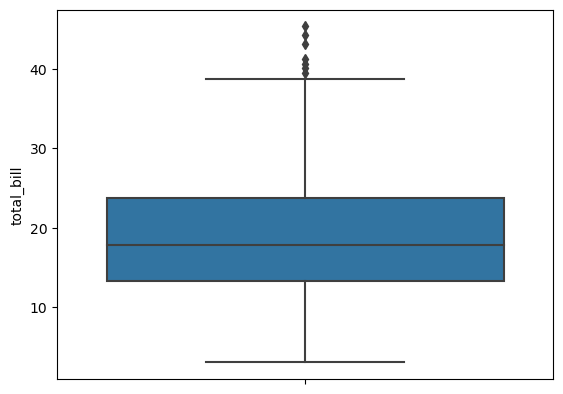

In [10]:
sns.boxplot(y='total_bill', data=Tip)

In [11]:
#Trimming and capping



In [12]:
lowerLimit = Tip["total_bill"].quantile(0.05)
upperLimit = Tip["total_bill"].quantile(0.95)

In [13]:
upperLimit

34.827

In [14]:
Tip['new_total'] = Tip['total_bill'].clip(lowerLimit, upperLimit)


In [15]:
Tip

,total_bill,tip,sex,smoker,day,time,size,new_total
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,17.82


In [16]:
sns.boxplot(y='new_column', data=Tip)

ValueError: Could not interpret input 'new_column'